## Name : PINKRAH NANA OFOSUHENE - 4295120

## INDEX NUMBER : 4295120

## COURSE : PREDICTION OF THE TROPICAL SYSTEM

<h1 style='font-size:3rem;color:red;'>ASSIGNMENT</h1>

In [1]:
# importing libriaries 
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# I will be using Optimal Interpolation (OI) Method to combine the observational data with the NWP model output,
# Because of it's simplicity and easy to use, It requires minimal computational resources and is straightforward to implement, 

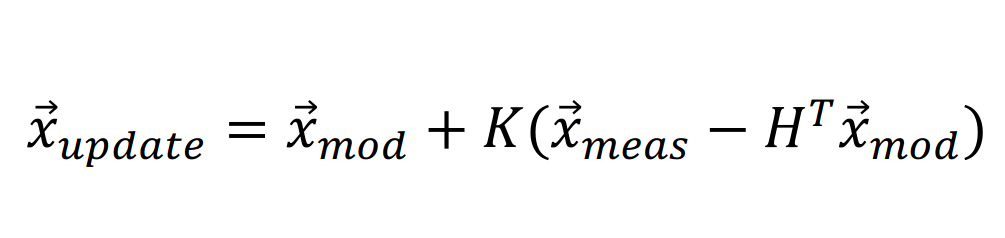

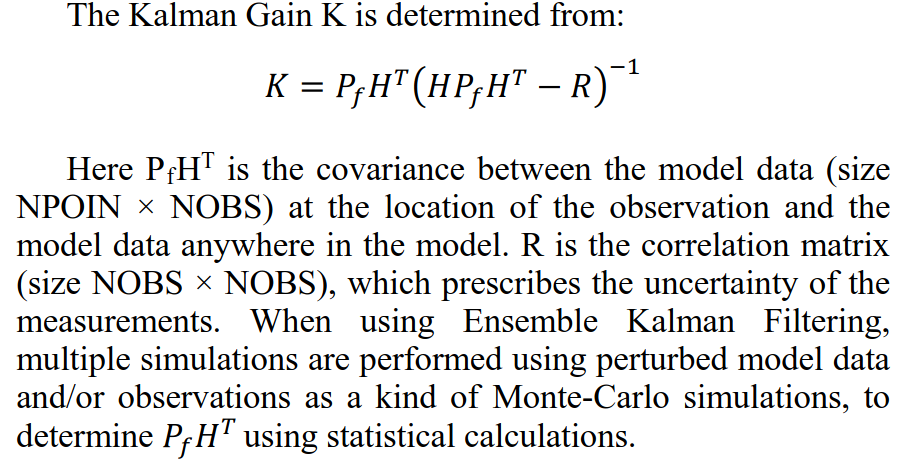

In [17]:

image1 = Image.open("Screenshot from 2024-06-02 13-46-51.png")
image2 = Image.open("Screenshot from 2024-06-02 14-35-19.png")
if image1.mode == "RGBA":
    image1 = image1.convert("RGB")
if image2.mode == "RGBA":
    image2 = image2.convert("RGB")
display(image1, image2)


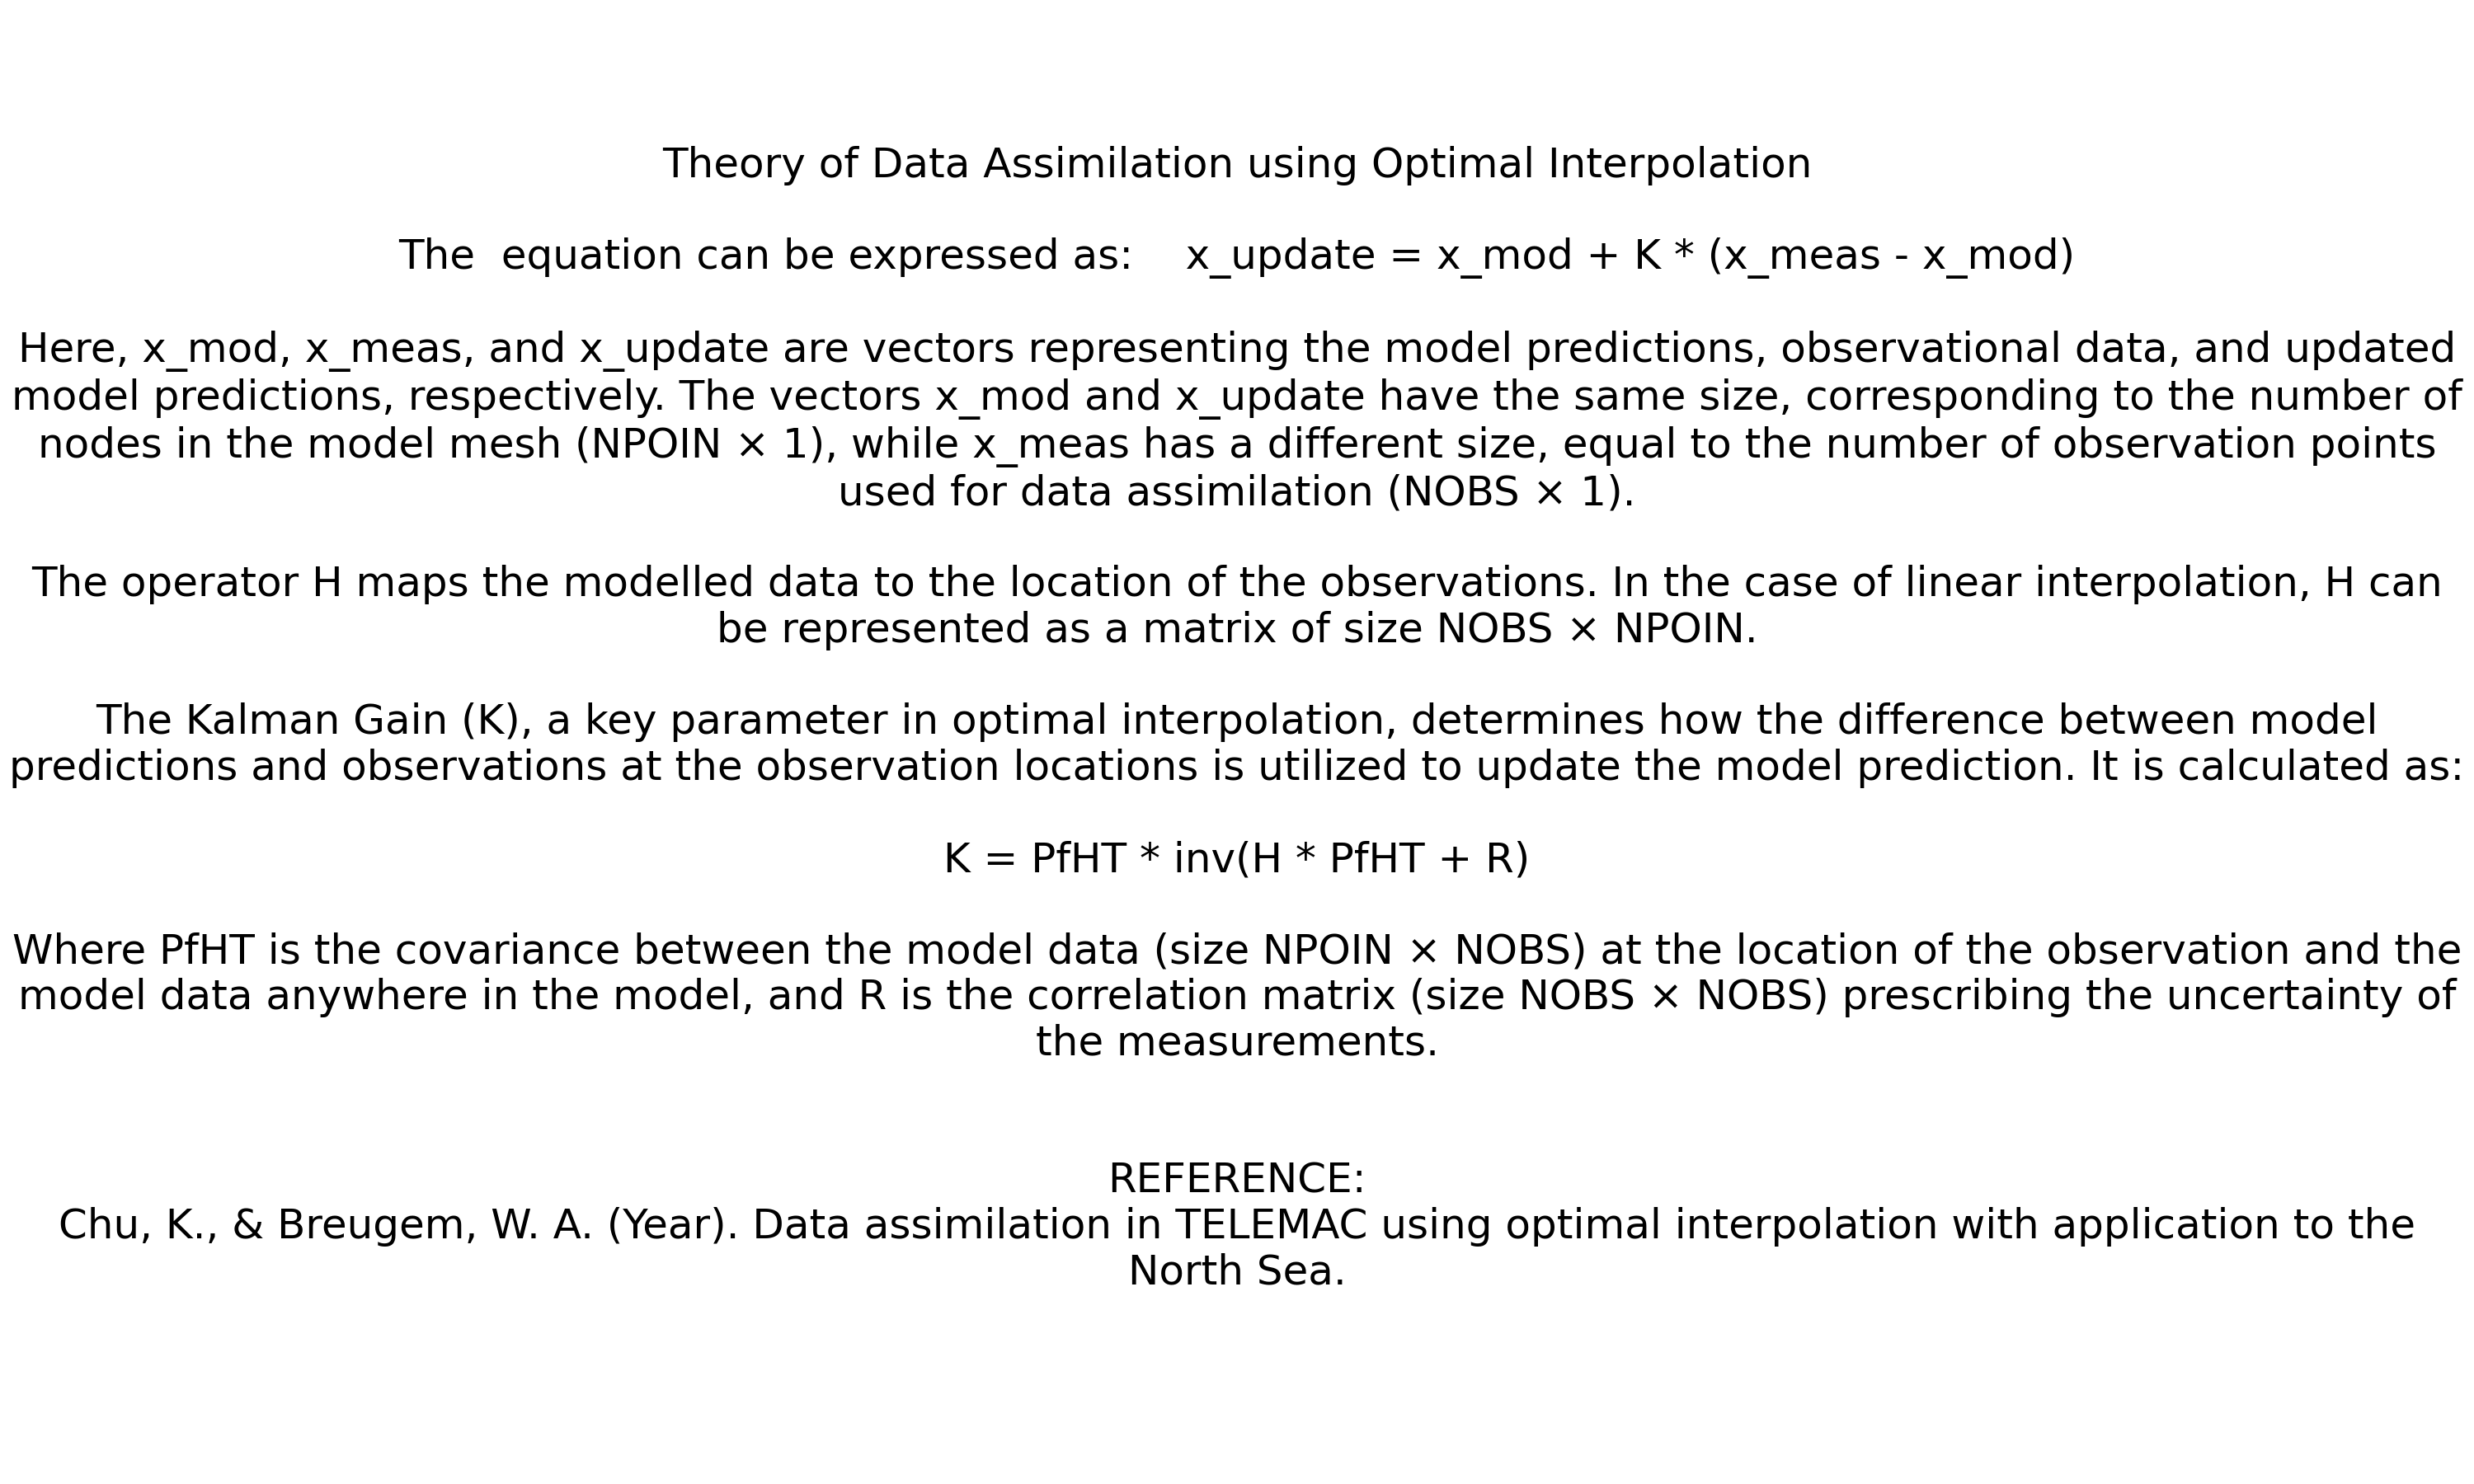

In [25]:
image3 = Image.open("theory_of_data_assimilation.png")
if image3.mode != "RGB":
    image3 = image3.convert("RGB")
display(image3)

In [3]:
#loading observational data in numpy array 
observations = np.array([15.2,16.1,14.5,15.8,25.0])

# loading apredictions
model_output = np.array([14.8,15.5,14.0,16.0,25.3])

In [4]:
# Define the background error variance and observation error variance

# Calculating the background error variance
sigma_b2 = np.var(model_output - observations)

# Calculating the observation error variance
sigma_r2 = np.var(observations - model_output)

# Calculating the Kalman Gain
K = sigma_b2 / (sigma_b2 + sigma_r2)

# Performing Optimal Interpolation to update the model predictions using the formular above
analysis_state = model_output + K * (observations - model_output)

# model predictions after assimilating the observational data using optimal interpolation.
for i, state in enumerate(analysis_state, start=1):
    print(f"Day {i}: Analysis State = {state:.4f}°C")


Day 1: Analysis State = 15.0000°C
Day 2: Analysis State = 15.8000°C
Day 3: Analysis State = 14.2500°C
Day 4: Analysis State = 15.9000°C
Day 5: Analysis State = 25.1500°C


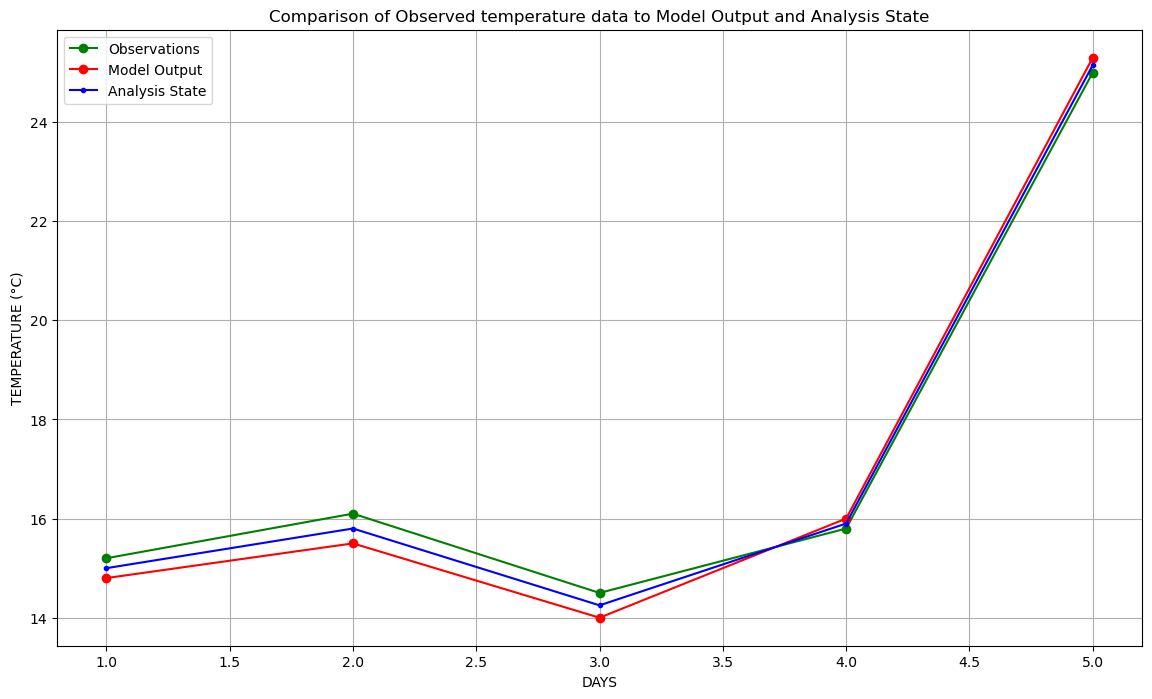

In [28]:
# Plotting the results obtained
days = np.arange(1, 6,1)  # Days for x-axis

# selecting figure size of Y and X axis
plt.figure(figsize=(14, 8))

# ploting temodel output, observations, and analysis state
plt.plot(days, observations, color='green', marker='o', label='Observations')

# PLOTING THE model_output data 
plt.plot(days, model_output, color='red', marker='o', label='Model Output')

# plotting the analysis data
plt.plot(days, analysis_state,color='blue', marker='.', label='Analysis State')

# labelling x axis as DAYS
plt.xlabel('DAYS')

#labelling Y-axis as Temperature
plt.ylabel('TEMPERATURE (°C)')

#adding title to the plot
plt.title('Comparison of Observed temperature data to Model Output and Analysis State')

# adding legend for easy identification
plt.legend()
plt.grid(True)

In [29]:
# Calculating the Root Mean Square Error (RMSE) between the observational, output, and analyzed data

# Calculating RMSE between Observations and Model Output
rmse_obs_model = np.sqrt(np.mean((observations - model_output)**2))

# Calculating RMSE between Observations and Analysis
rmse_obs_analysis = np.sqrt(np.mean((observations - analysis_state)**2))

# Calculating Bias between Observations and Model Output
bias_obs_model = np.mean(observations - model_output)

# Calculating Bias between Observations and Analysis
bias_obs_analysis = np.mean(observations - analysis_state)

# Printing the calculated RMSE and Bias
print("RMSE between Observations and Model Output:", rmse_obs_model)
print("RMSE between Observations and Analysis:", rmse_obs_analysis)
print("Bias between Observations and Model Output:", bias_obs_model)
print("Bias between Observations and Analysis:", bias_obs_analysis)


RMSE between Observations and Model Output: 0.4242640687119287
RMSE between Observations and Analysis: 0.2121320343559641
Bias between Observations and Model Output: 0.2
Bias between Observations and Analysis: 0.10000000000000035


# Assimilating observational data with Optimal Interpolation and the Kalman filter markedly improves temperature predictions. The Root Mean Square Error (RMSE) is halved, indicating closer alignment with observed values. Moreover, bias is reduced by half, demonstrating more balanced adjustments. This underscores the effectiveness of data assimilation in enhancing forecast accuracy and reliability.